<h1 style="text-align: center;">Análise Descritiva do Churn do Banco</h1>

### Importações

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### Sistema de plotagem de gráfico

In [194]:
def plot_chart(df, value_column, label_column, chart_type, title='', colors = ['#E69F00', '#56B4E9',  '#009E73',  '#F0E442',  '#0072B2', '#D55E00', '#CC79A7', '#999999'] , startangle=140, show_legend=True, bins=10):
    if chart_type == 'pie':
        plt.figure(figsize=(8, 8))
        plt.pie(df[value_column], labels=df[label_column], autopct='%1.1f%%', startangle=startangle, colors=colors)
        plt.title(title)
    elif chart_type == 'bar':
        plt.figure(figsize=(10, 6))
        bars = plt.bar(df[label_column], df[value_column], color=colors)
        plt.title(title)
        plt.tight_layout()
        plt.xlabel(label_column)
        plt.ylabel(value_column)
        plt.xticks(rotation=45)
        if show_legend:
            for bar in bars:
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width() / 2., 1.05*height, '%d' % int(height), ha='center', va='bottom')
    elif chart_type == 'line':
        plt.figure(figsize=(10, 6))
        plt.plot(df[label_column], df[value_column], marker='o', linestyle='-', color=colors[0], label=label_column)
        plt.title(title)
        plt.tight_layout()
        plt.xlabel(label_column)
        plt.ylabel(value_column)
        plt.xticks(rotation=45)
        plt.legend()
        if show_legend:
            for _, row in df.iterrows():
                plt.text(row[label_column], row[value_column], '%d' % row[value_column], ha='center', va='bottom')
    elif chart_type == 'boxplot':
        plt.figure(figsize=(10, 6))
        df.boxplot(column=value_column, by=label_column, patch_artist=True, boxprops=dict(facecolor=colors[0]), medianprops=dict(color="yellow"))
        plt.title(title)
        plt.suptitle('')
        plt.xlabel(label_column)
        plt.ylabel(value_column)
        plt.xticks(rotation=45)
    elif chart_type == 'scatter':
        plt.figure(figsize=(10, 6))
        plt.scatter(df[label_column], df[value_column], color=colors[0], label=label_column)
        plt.title(title)
        plt.tight_layout()
        plt.xlabel(label_column)
        plt.ylabel(value_column)
        plt.xticks(rotation=45)
        if show_legend:
            plt.legend()
    elif chart_type == 'histogram':
        plt.figure(figsize=(10, 6))
        plt.hist(df[value_column], bins=bins, color=colors[0])
        plt.title(title)
        plt.xlabel(value_column)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.xticks(rotation=45)
    elif chart_type == 'stacked_bar':
        plt.figure(figsize=(10, 6))
        cum_values = np.zeros(len(df))
        for i, col in enumerate(value_column):
            plt.bar(df[label_column], df[col], bottom=cum_values, color=colors[i % len(colors)], label=col)
            if show_legend:
                for j in range(len(cum_values)):
                    plt.text(j, cum_values[j] + df[col].iloc[j]/2, str(df[col].iloc[j]), ha='center', va='center')
            cum_values += df[col].values
        plt.title(title)
        plt.xlabel(label_column)
        plt.ylabel('Total')
        plt.xticks(rotation=45)
        plt.legend()


    plt.show()


### Leitura do DF

In [195]:
df = pd.read_csv('../dataset/customerChurnRecords.csv')
display(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


### Análise de integridade do DF

In [196]:
display(df.dtypes)
display(df.isnull().sum())
display(df.shape)

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

(10000, 18)

### Transformação para o tipo categorico

In [197]:
df['HasCrCard'] = df['HasCrCard'].astype('category')
df['IsActiveMember'] = df['IsActiveMember'].astype('category')
df['Exited'] = df['Exited'].astype('category')
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 40, 50, 60, 70, 80, 90, 100], labels=['<18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '>90'])
df['IsActiveMember'] = np.where(df['IsActiveMember'] == 1, 'Ativo', 'Inativo')

### Análises

##### Quantidade de clientes por idade

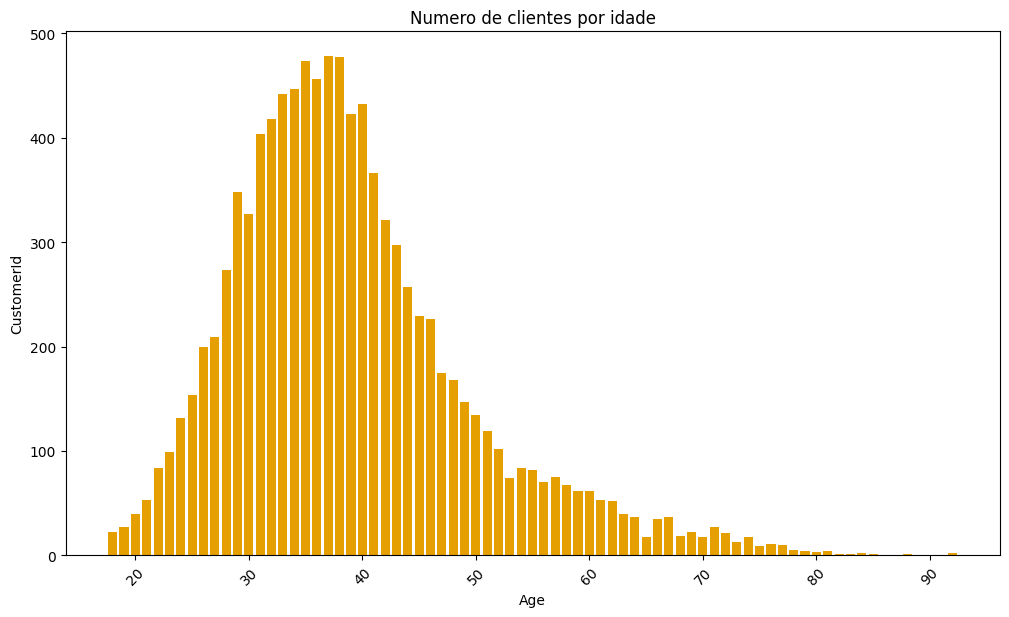

In [198]:
clientes = df.groupby(['Age']).agg(
    {'CustomerId': 'nunique'}
).reset_index()

plot_chart(clientes, 'CustomerId', 'Age', 'bar', title='Numero de clientes por idade', colors=['#E69F00'], show_legend=False)

**Resumo do gráfico**
* A maioria dos clientes está na faixa dos 30 aos 40 anos, com o pico de clientes por volta dos 35 anos.
* Há uma clara tendência de decrescimento no número de clientes à medida que a idade aumenta após o pico.
* Clientes com menos de 20 anos ou mais de 70 anos são significativamente menos numerosos.
* A distribuição de idade dos clientes tem uma forma aproximadamente simétrica, sugerindo que o número de clientes aumenta com a idade até o meio dos 30 anos e depois diminui de forma similar.
* Existe um declínio acentuado no número de clientes após os 60 anos.

**Utilidade:** Esse gráfico pode ser útil para entender o perfil etário da base de clientes e direcionar estratégias de marketing e desenvolvimento de produtos.

##### Relação entre idade e score de crédito

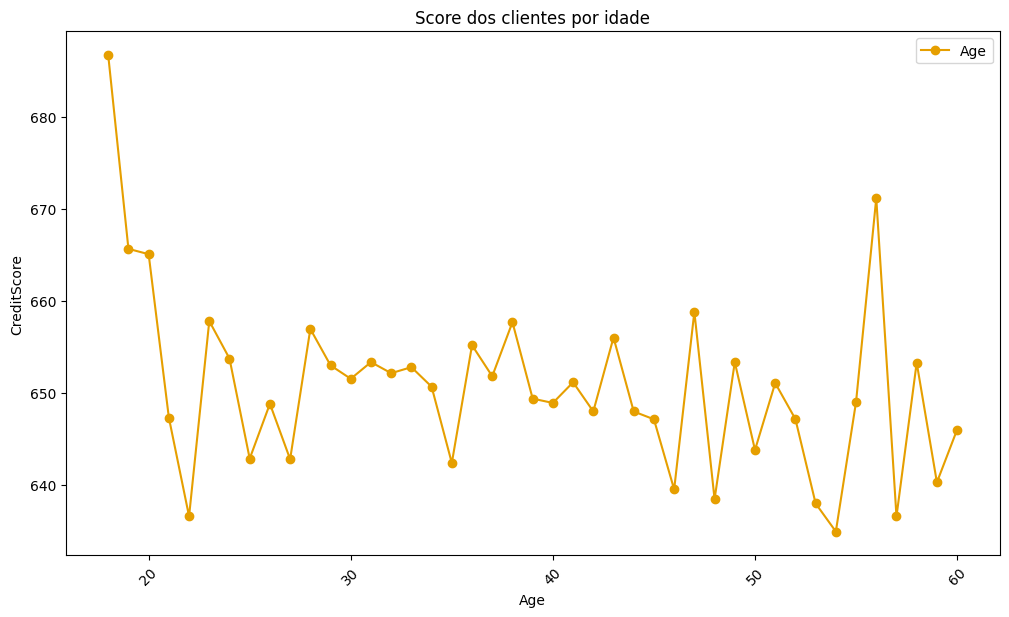

In [215]:
max_age = df[df['Age'] <= 60]
score_casa = max_age.groupby(['Age']).agg(
    {'CreditScore': 'mean'}
).reset_index()

plot_chart(score_casa, 'CreditScore', 'Age', 'line', title='Score dos clientes por idade', colors=['#E69F00'], show_legend=False)

**Resumo do gráfico**
* Existe uma variação considerável nos scores de crédito ao longo das diferentes idades.
* O score de crédito mais alto registrado no gráfico está na faixa etária mais jovem, abaixo dos 20 anos.
* Há uma tendência de declínio no score de crédito a partir dos 20 anos, atingindo o menor ponto próximo dos 30 anos.
* Entre os 30 e 60 anos, o score de crédito flutua, mas não mostra uma tendência clara de aumento ou diminuição com a idade.
* Nota-se picos e vales acentuados, sugerindo que a idade pode não ser o único fator que impacta o score de crédito dos clientes e que outras variáveis podem ter influência significativa.

**Utilidade:** pode ser útil para mostrar que no banco, os clientes começam com um score muito alto, mas depois de uma certa idade podem acabar se endividando, e consequentemente a queda repentina do score

#### Distribuição de churn por país

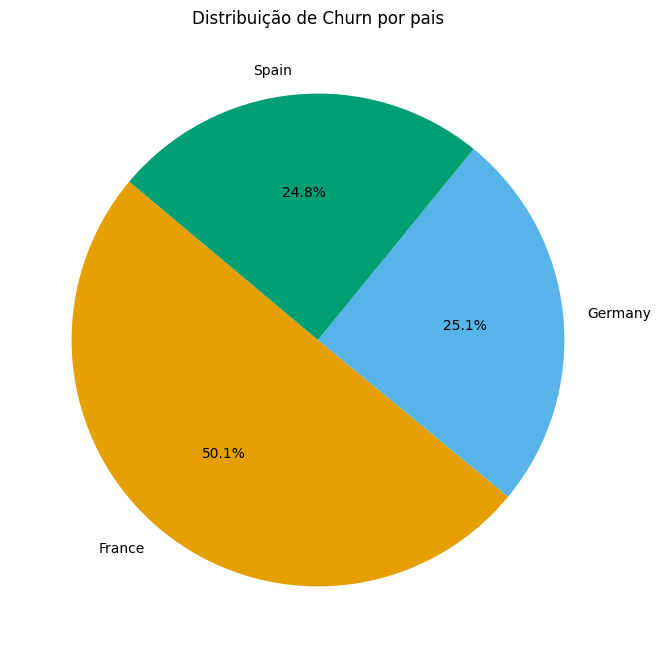

In [200]:
churn = df.groupby(['Geography']).agg(
    {'Exited': 'count'}
).reset_index()

plot_chart(churn, 'Exited', 'Geography', 'pie', title="Distribuição de Churn por pais", show_legend=False)

**Resumo do gráfico**
* A França lidera o churn com uma ligeira maioria de 50,1%, indicando que metade dos clientes que deixaram de usar o serviço ou produto são deste país.
* A Alemanha e a Espanha têm porcentagens quase iguais de churn, 25,1% e 24,8% respectivamente, sugerindo uma similaridade na taxa de clientes que cancelam ou deixam a empresa nestes locais.
* O equilíbrio entre a Alemanha e a Espanha contrasta fortemente com a proporção significativamente maior da França.

**Utilidade:** ele é importante para entender em quais mercados a empresa está enfrentando maiores desafios de retenção de clientes e onde pode precisar investir mais em estratégias de fidelização e satisfação do cliente.

#### Relação entre tipo de cartão e país

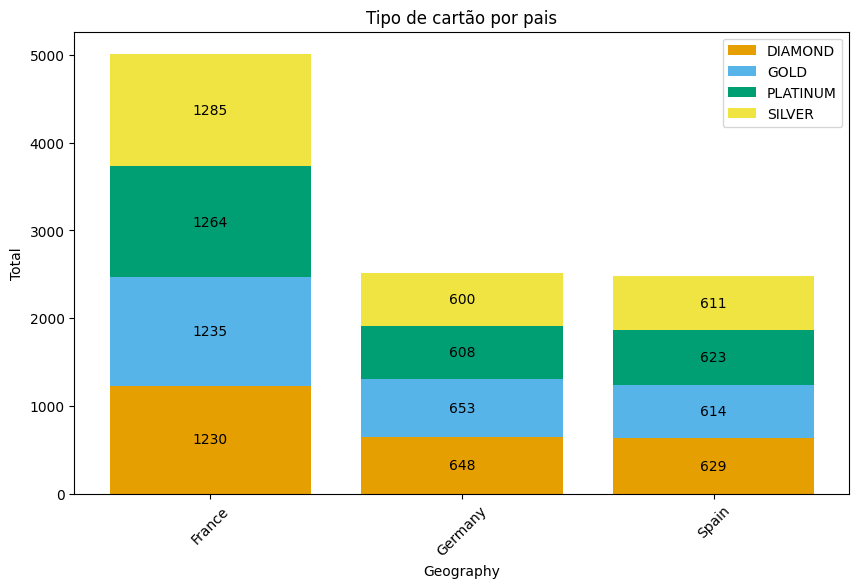

In [201]:
card = df.groupby(['Geography', 'Card Type']).agg(
    {'CustomerId': 'nunique'}
).reset_index()

card_pivoted = card.pivot(index='Geography', columns='Card Type', values='CustomerId').reset_index()

plot_chart(card_pivoted, [col for col in card_pivoted.columns if col != 'Geography'], 'Geography', 'stacked_bar', title='Tipo de cartão por pais', show_legend=True)


**Resumo do gráfico**
* A França tem a maior distribuição total de cartões de todos os tipos, com o cartão Diamond sendo o mais comum.
* Na Alemanha e na Espanha, os números são relativamente similares para todos os tipos de cartões, mas na Espanha, os cartões Diamond e Platinum são ligeiramente mais prevalentes do que Gold e Silver.
* Os cartões Gold são os menos comuns na Alemanha, enquanto os cartões Silver são os menos comuns na França.
* Todos os três países têm uma distribuição bastante equilibrada entre os diferentes tipos de cartões, sugerindo uma política de emissão de cartões possivelmente uniforme entre eles.

**Utilidade:** Estes dados são úteis para análises de mercado e estratégias de produtos financeiros, oferecendo insights sobre a preferência dos consumidores por tipos de cartões de crédito em diferentes países.

#### Score de crédito utilizados por gênero

<Figure size 1000x600 with 0 Axes>

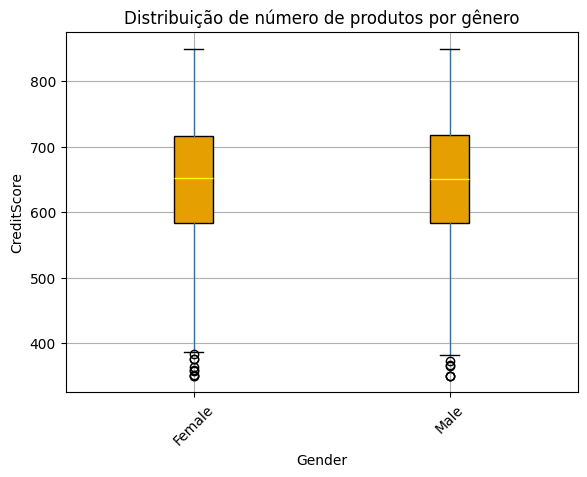

In [202]:
produtos = df[['Gender', 'CreditScore']]
plot_chart(produtos, 'CreditScore', 'Gender', 'boxplot', title='Distribuição de número de produtos por gênero')

**Resumo do gráfico**
* A mediana do score de crédito, representada pela linha dentro da caixa, parece ser muito próxima para ambos os gêneros.
* A distribuição dos scores de crédito é semelhante entre homens e mulheres, como indicado pelas caixas e pelos bigodes (linhas que se estendem a partir da caixa), que parecem ter comprimentos semelhantes.
* Não há indicação de outliers extremos, pois não há pontos fora dos bigodes, o que significaria scores muito altos ou muito baixos em comparação com a maioria.
* O score de crédito para ambos os gêneros varia entre um pouco acima de 400 até 800, com a maior concentração de scores entre aproximadamente 600 e 700.

**Utilidade:** Esse gráfico pode ser útil para entender a relação entre gênero e score de crédito em uma determinada população ou base de clientes, mostrando que não há diferenças significativas entre os dois grupos, porem comparando os OutLayers, o sexo feminino tem mais do que o sexo masculino.

#### Renda estimada versus idade

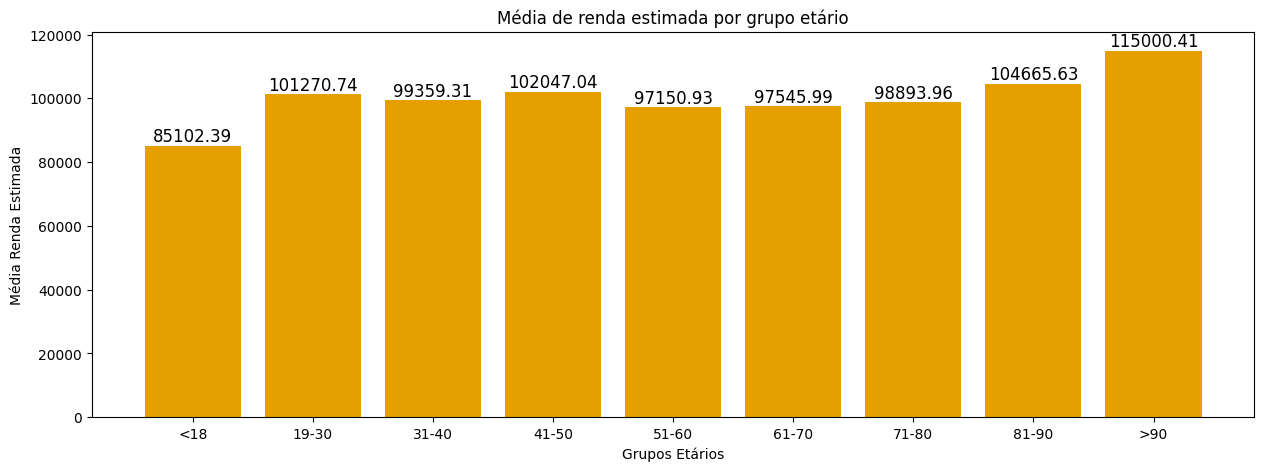

In [218]:
plt.figure(figsize=(15, 5))
plt.title('Média de renda estimada por grupo etário')
plt.xlabel('Grupos Etários')
plt.ylabel('Média Renda Estimada')

mediaSalario = df.groupby('AgeGroup')['EstimatedSalary'].mean()
barra = plt.bar(mediaSalario.index.astype(str), mediaSalario.values, color='#E69F00')

plt.bar_label(container= barra,
            size = 12,
            labels=mediaSalario.round(2),
            label_type= 'edge',
            )

plt.show()


**Resumo do gráfico**
* A faixa etária com a maior renda média estimada é a dos indivíduos com mais de 90 anos, ultrapassando 115.000.
* Há um aumento na média de renda estimada a partir do grupo de menos de 18 anos, atingindo um pico no grupo de 41-50 anos.
* Após os 50 anos, a renda média estimada diminui ligeiramente até o grupo de 61-70 anos e depois começa a aumentar novamente.
* O grupo de 81-90 anos tem uma média de renda estimada maior do que os grupos de 61-70 e 71-80 anos.
* Os grupos de idade de 19-30 e 31-40 anos têm rendas médias estimadas muito próximas, ambas um pouco abaixo de 100.000.

**Utilidade:** útil para entender como a renda varia com a idade e pode auxiliar no direcionamento de produtos e serviços financeiros para grupos etários específicos com base na renda média.

#### Média de saldo por faixa etária

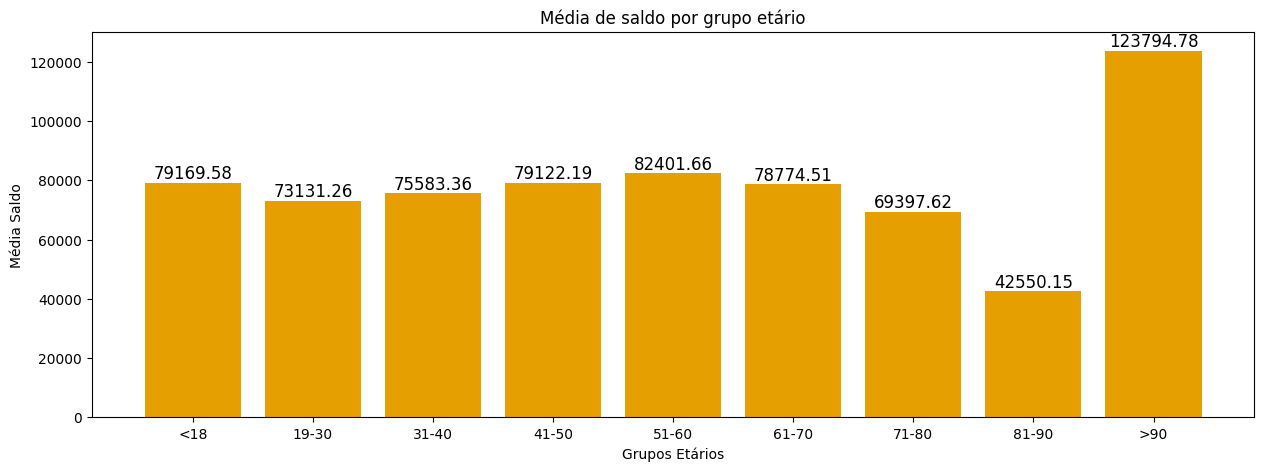

In [217]:
plt.figure(figsize=(15, 5))
plt.title('Média de saldo por grupo etário')
plt.xlabel('Grupos Etários')
plt.ylabel('Média Saldo')

mediaSalario = df.groupby('AgeGroup')['Balance'].mean()
barra = plt.bar(mediaSalario.index.astype(str), mediaSalario.values, color='#E69F00')

plt.bar_label(container= barra,
            size = 12,
            labels=mediaSalario.round(2),
            label_type= 'edge',
            )

plt.show()

**Resumo do gráfico**
* O grupo etário com a média de saldo mais alta é o de indivíduos com mais de 90 anos, onde o saldo médio excede 120.000.
* Observa-se um padrão crescente na média de saldo à medida que as faixas etárias aumentam, desde os menores de 18 anos até o grupo de 51-60 anos.
* Após atingir um pico no grupo de 51-60 anos, há um declínio nos grupos de 61-70 e 71-80 anos.
* Curiosamente, há uma queda acentuada na média de saldo para o grupo de 81-90 anos, antes do aumento dramático para o grupo de mais de 90 anos.
* As médias de saldo para os grupos mais jovens, de menos de 18 anos até 40-50 anos, variam menos em comparação com as variações observadas nos grupos de idade mais avançada.

**Utilidade:** Estas informações podem ser úteis para análise demográfica e financeira, mostrando como o saldo médio em contas varia com a idade e pode indicar tendências de economia ou acumulação de patrimônio ao longo da vida.

#### Atividade do cliente versus saldo em conta, por faixa etária

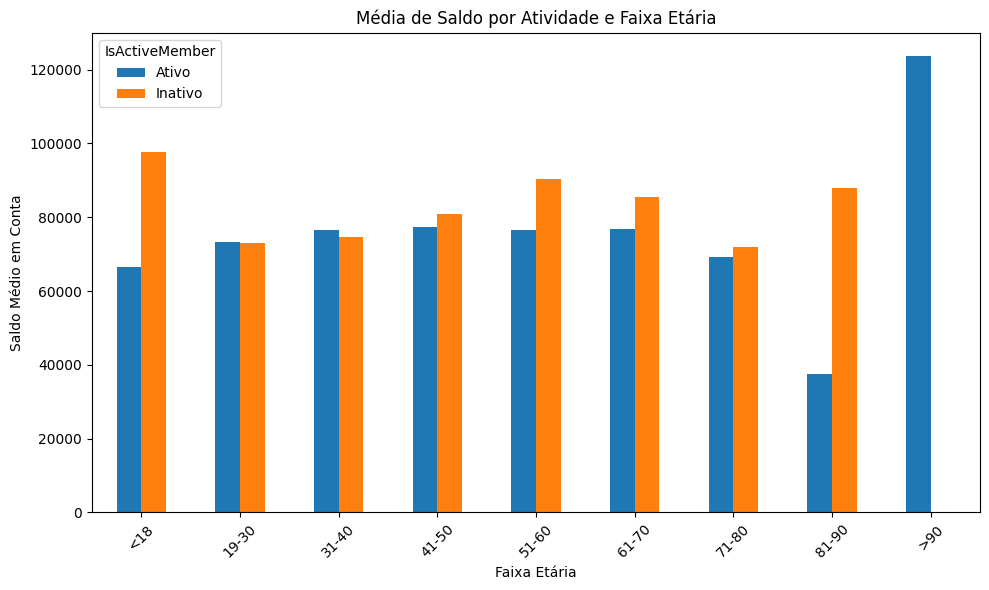

In [205]:
dfAtividadeSaldo = df.groupby(["AgeGroup", "IsActiveMember"])['Balance'].mean().unstack(fill_value=0)

dfAtividadeSaldo.plot(kind='bar', figsize=(10, 6))
plt.title('Média de Saldo por Atividade e Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Saldo Médio em Conta')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Resumo do gráfico:** 
* Em todas as faixas etárias, membros ativos tendem a ter uma média de saldo em conta menor do que membros inativos.
* A maior diferença entre os saldos médios de membros ativos e inativos ocorre na faixa etária de menos de 18 anos, onde os inativos têm, em média, um saldo significativamente maior. 
* A partir da faixa de 31-40 anos até a faixa de 71-80 anos, a diferença entre os saldos médios diminui progressivamente, indicando uma convergência mais próxima entre ativos e inativos. 
* Nota-se um aumento substancial no saldo médio dos membros inativos na faixa etária acima de 90 anos, sugerindo que membros muito idosos acumularam maiores quantias em suas contas ou que os saldos não são mais utilizados como quando eram mais jovens. 
* A faixa etária de 81-90 anos apresenta uma anomalia onde a média de saldo dos membros ativos é maior do que a dos membros inativos, contrariando a tendência observada nas outras faixas etárias.

**Utilidade:**  Entender o comportamento financeiro dos membros de uma instituição, banco ou programa de acordo com a atividade e idade, oferecendo insights para estratégias de marketing, produtos financeiros direcionados ou iniciativas de engajamento.


####  Satisfação por número de produtos por idade

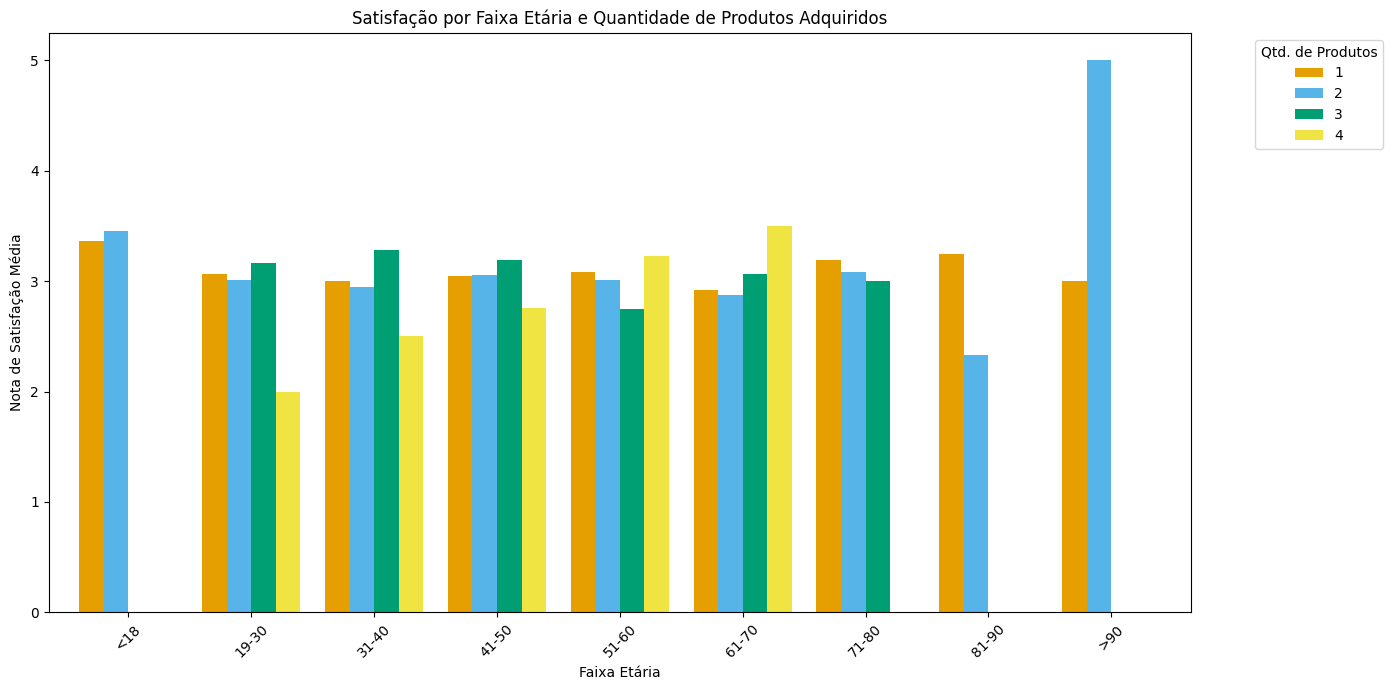

In [214]:
faixas_etarias = pd.cut(df['Age'], bins=[0, 18, 30, 40, 50, 60, 70, 80, 90, 100], 
                        labels=['<18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '>90'])
df['AgeGroup'] = faixas_etarias
grouped_data = df.groupby(['AgeGroup', 'NumOfProducts'])['Satisfaction Score'].mean().reset_index()

pivot_table = grouped_data.pivot_table(index='AgeGroup', columns='NumOfProducts', values='Satisfaction Score', fill_value=0)

colors = ['#E69F00', '#56B4E9',  '#009E73',  '#F0E442', '#0072B2', '#D55E00', '#CC79A7', '#999999']

ax = pivot_table.plot(kind='bar', figsize=(14, 7), width=0.8, color=colors)

plt.title('Satisfação por Faixa Etária e Quantidade de Produtos Adquiridos')
plt.xlabel('Faixa Etária')
plt.ylabel('Nota de Satisfação Média')
plt.xticks(rotation=45)
plt.legend(title='Qtd. de Produtos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


**Resumo do gráfico**
* Clientes com mais de 90 anos que adquiriram 4 produtos têm a maior nota de satisfação média, muito acima das outras notas.
* Em geral, a nota de satisfação aumenta com a quantidade de produtos adquiridos, mas essa tendência não é consistente em todas as faixas etárias.
* A faixa etária de 19-30 anos tem a menor variação na satisfação, independentemente da quantidade de produtos adquiridos.
* Clientes entre 71-80 anos que adquiriram 1 produto têm a menor nota de satisfação média.
* As faixas etárias de 31-40, 41-50, 51-60 e 61-70 apresentam uma tendência crescente de satisfação à medida que aumenta a quantidade de produtos adquiridos.

**Utilidade:** pode ser utilizado para entender como a idade dos clientes e a quantidade de produtos adquiridos impactam a satisfação do cliente, o que pode ajudar na criação de estratégias de marketing e vendas direcionadas a diferentes segmentos de clientes.

#### Reclamações por região por idade

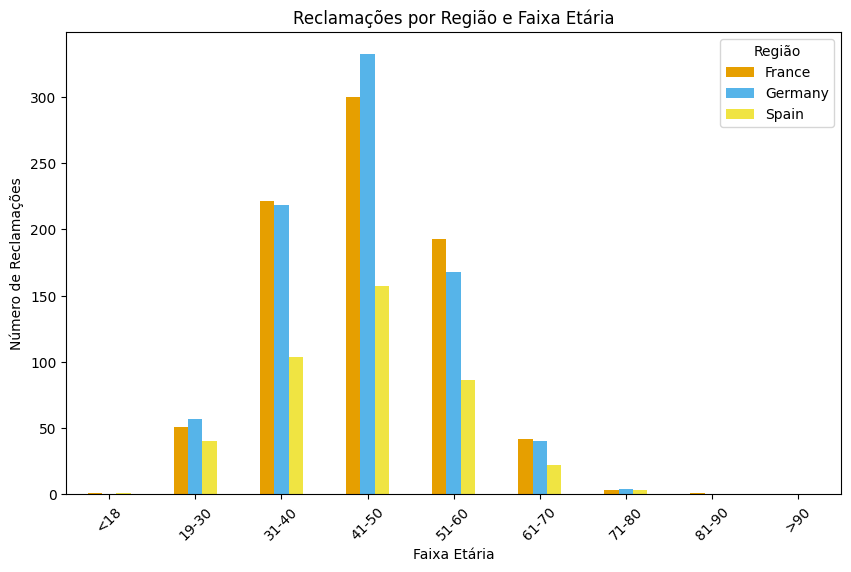

In [207]:
faixas_etarias = pd.cut(df['Age'], bins=[0, 18, 30, 40, 50, 60, 70, 80, 90, 100], labels=['<18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '>90'])

df['AgeGroup'] = faixas_etarias
df_reclamacao = df.groupby(['Geography', 'AgeGroup']).agg({'Complain': 'sum'}).reset_index()

df_pivot = df_reclamacao.pivot(index='AgeGroup', columns='Geography', values='Complain').fillna(0)

df_pivot.plot(kind='bar', figsize=(10, 6), color=['#E69F00', '#56B4E9', '#F0E442'])
plt.title('Reclamações por Região e Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Reclamações')
plt.xticks(rotation=45)
plt.legend(title='Região')
plt.show()


**Resumo do gráfico**
* A Alemanha apresenta o maior número de reclamações em quase todas as faixas etárias, especialmente notável na faixa de 41-50 anos.
* Espanha tem o menor número de reclamações em comparação com França e Alemanha, exceto na faixa de 81-90 anos, onde não há reclamações registradas.
* A faixa etária de 41-50 anos é a que mais reclama na Alemanha, seguida pela mesma faixa etária na França.
* Em termos gerais, a quantidade de reclamações diminui para clientes acima de 60 anos nas três regiões.
* Para clientes com mais de 90 anos, há um número insignificante de reclamações, sendo a França a única região que apresenta um pequeno número.

**Utilidade:**  pode ser útil para as empresas identificarem faixas etárias com maior número de reclamações e focarem na melhoria da satisfação do cliente nesses grupos. Também pode indicar onde esforços de qualidade e serviço ao cliente podem ser aprimorados em diferentes regiões.

#### Churn por faixa etária

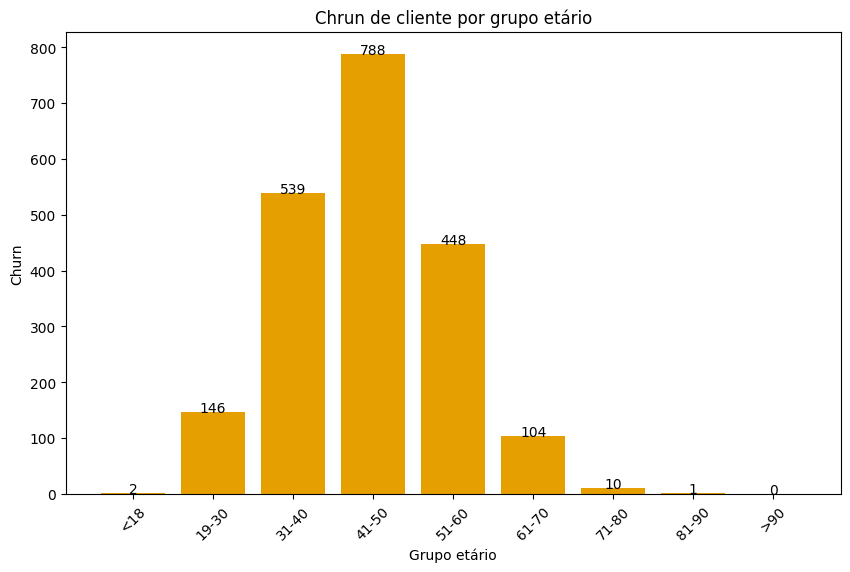

In [208]:
df['Exited'] = df['Exited'].astype(int)

faixas_etarias = pd.cut(df['Age'], bins=[0, 18, 30, 40, 50, 60, 70, 80, 90, 100], labels=['<18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '>90'])

df_churn = df.groupby(faixas_etarias)['Exited'].sum().reset_index()


plt.figure(figsize=(10, 6)) 
plt.bar(df_churn['Age'].astype(str), df_churn['Exited'], color='#E69F00')
plt.title('Chrun de cliente por grupo etário')
plt.xlabel('Grupo etário')
plt.ylabel('Churn')

for index, value in enumerate(df_churn['Exited']):
    plt.text(index, value, str(value), ha='center')

plt.xticks(rotation=45)
plt.show()

**Resumo do gráfico**
* O grupo etário de 41-50 anos tem a maior taxa de churn, com 788 clientes tendo deixado a empresa ou serviço.
* Seguido por este, o grupo de 31-40 anos tem a segunda maior taxa, com 539 clientes churned.
* As taxas de churn caem significativamente após os 50 anos, com uma redução acentuada para clientes acima de 60 anos.
* A taxa de churn é mais baixa entre os mais jovens (abaixo de 18 anos) e os mais velhos (acima de 80 anos), com esses grupos mostrando números quase insignificantes.
* Não há churn registrado para clientes com mais de 90 anos.

**Utilidade:** podem ser extremamente úteis para a empresa analisar suas estratégias de retenção de clientes e entender em quais grupos etários elas podem estar falhando ou sendo bem-sucedidas.